In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.metrics import classification_report,confusion_matrix
from scikitplot.metrics import plot_precision_recall,plot_roc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN
from collections import Counter 
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
df=np.loadtxt(r'C:\Users\gayat\Downloads\household_power_consumption.txt', delimiter=';',skiprows=1,dtype=str)

In [3]:
df=pd.DataFrame(df)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [5]:
df.rename(columns = {0:'Date',1:'Time',2:'Global_Active_Power',3:'Global_Reactive_Power',4:'Voltage',
                    5:'Global_Intensity',6:'Sub_Metering_1',7:'Sub_Metering_2',8:'Sub_Metering_3'}, inplace = True)

In [6]:
df.head()

,Date,Time,Global_Active_Power,Global_Reactive_Power,Voltage,Global_Intensity,Sub_Metering_1,Sub_Metering_2,Sub_Metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [7]:
df.isnull().sum()

Date                     0
Time                     0
Global_Active_Power      0
Global_Reactive_Power    0
Voltage                  0
Global_Intensity         0
Sub_Metering_1           0
Sub_Metering_2           0
Sub_Metering_3           0
dtype: int64

In [8]:
year_feature = [feature for feature in df if  'Date' in feature]
year_feature

['Date']

In [9]:
for feature in year_feature:
    print(feature, df[feature].unique())

Date ['16/12/2006' '17/12/2006' '18/12/2006' ... '24/11/2010' '25/11/2010'
 '26/11/2010']


In [10]:
df.isnull().sum()

Date                     0
Time                     0
Global_Active_Power      0
Global_Reactive_Power    0
Voltage                  0
Global_Intensity         0
Sub_Metering_1           0
Sub_Metering_2           0
Sub_Metering_3           0
dtype: int64

In [11]:
df['Voltage'].value_counts()

?          25979
241.180     3559
241.120     3289
241.350     3285
241.020     3284
           ...  
225.120        1
224.770        1
224.680        1
224.240        1
253.160        1
Name: Voltage, Length: 2838, dtype: int64

In [12]:
df['Global_Active_Power'].value_counts()

?        25979
0.218     9565
0.216     9363
0.322     9350
0.324     9304
         ...  
7.094        1
7.930        1
8.274        1
8.246        1
8.600        1
Name: Global_Active_Power, Length: 4187, dtype: int64

In [40]:
df['Sub_Metering_3'].value_counts()

0.000     852092
1.000     471868
18.000    353163
17.000    156593
19.000    121326
           25979
12.000     16726
16.000     15831
11.000     11282
29.000      6931
13.000      5339
20.000      4670
28.000      4364
10.000      3309
30.000      3119
9.000       2011
6.000       1993
2.000       1970
7.000       1954
3.000       1935
8.000       1922
4.000       1913
5.000       1899
27.000      1337
26.000       771
21.000       726
23.000       714
22.000       700
25.000       689
24.000       664
15.000       653
14.000       538
31.000       278
Name: Sub_Metering_3, dtype: int64

In [15]:
df=df.replace(to_replace="?",value=" ")

In [43]:
df['Global_Active_Power']=df['Global_Active_Power'].replace(to_replace=" ",value=0.322)
df['Voltage']=df['Voltage'].replace(to_replace=" ",value=241.350)
df['Global_Intensity']=df['Global_Intensity'].replace(to_replace=" ",value=1.400)
df['Sub_Metering_1']=df['Sub_Metering_1'].replace(to_replace=" ",value=1.000)
df['Sub_Metering_2']=df['Sub_Metering_2'].replace(to_replace=" ",value=1.000)
df['Sub_Metering_3']=df['Sub_Metering_3'].replace(to_replace="",value=0.000)

In [16]:
#df['Global_Active_Power'].mean()
df['Global_Active_Power']=df['Global_Active_Power'].fillna(0.322)
df['Voltage']=df['Voltage'].fillna(241.350)

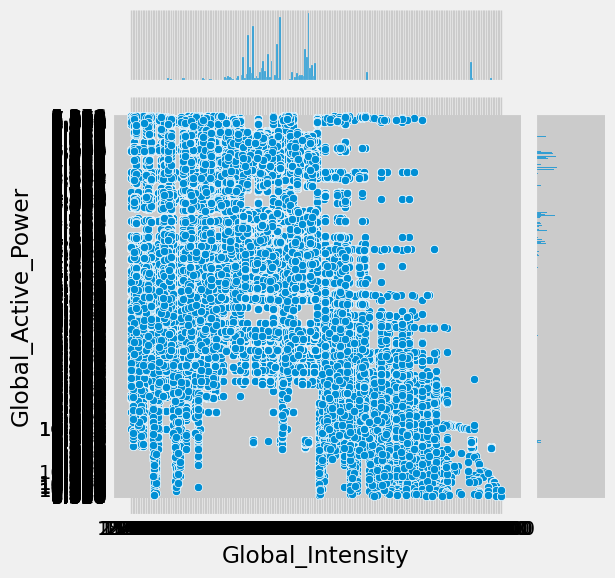

In [23]:
sns.jointplot(x='Global_Intensity', y='Global_Active_Power', data=df)  
plt.show()

In [26]:
df.columns

Index(['Date', 'Time', 'Global_Active_Power', 'Global_Reactive_Power',
       'Voltage', 'Global_Intensity', 'Sub_Metering_1', 'Sub_Metering_2',
       'Sub_Metering_3'],
      dtype='object')

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


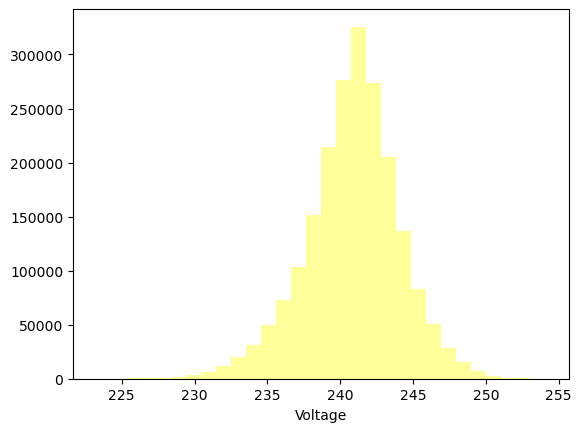

In [22]:
sns.distplot(df['Voltage'],kde=False,color='Yellow',bins=30)
plt.show ()

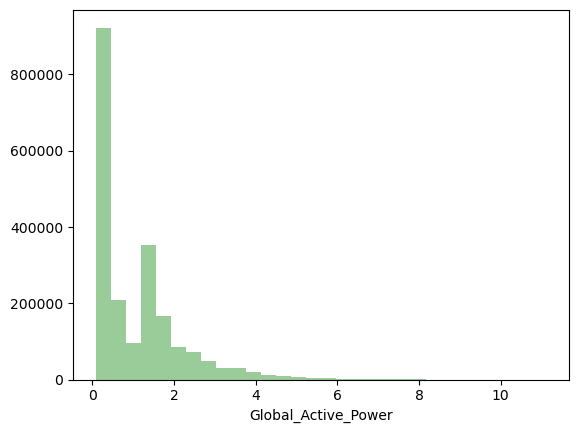

In [24]:
sns.distplot(df['Global_Active_Power'],kde=False,color='Green',bins=30)
plt.show ()

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


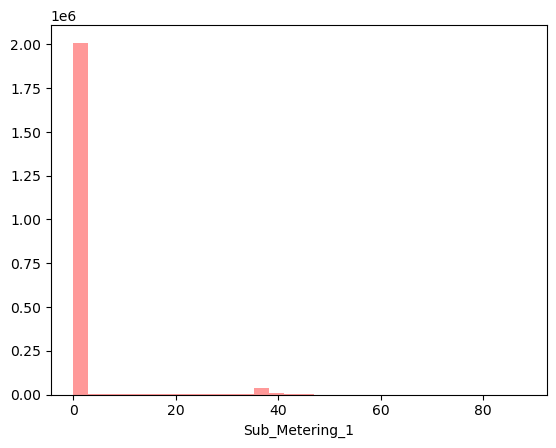

In [35]:
sns.distplot(df['Sub_Metering_1'],kde=False,color='Red',bins=30)
plt.show ()

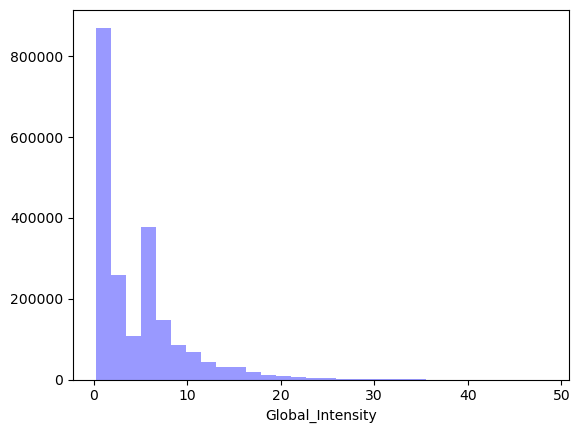

In [36]:
sns.distplot(df['Global_Intensity'],kde=False,color='Blue',bins=30)
plt.show ()

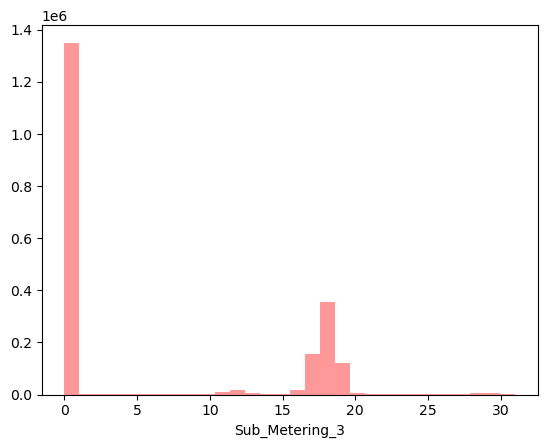

In [44]:
sns.distplot(df['Sub_Metering_3'],kde=False,color='Red',bins=30)
plt.show ()

#set date column as index for further analysis

In [23]:
df.columns

Index(['Date', 'Time', 'Global_Active_Power', 'Global_Reactive_Power',
       'Voltage', 'Global_Intensity', 'Sub_Metering_1', 'Sub_Metering_2',
       'Sub_Metering_3'],
      dtype='object')

In [48]:
df=df.set_index("Date")

In [51]:
df=pd.read_csv(r'C:\Users\gayat\Downloads\household_power_consumption.txt', sep=';', 
                   parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                   low_memory=False, na_values=['nan','?'], index_col='dt')

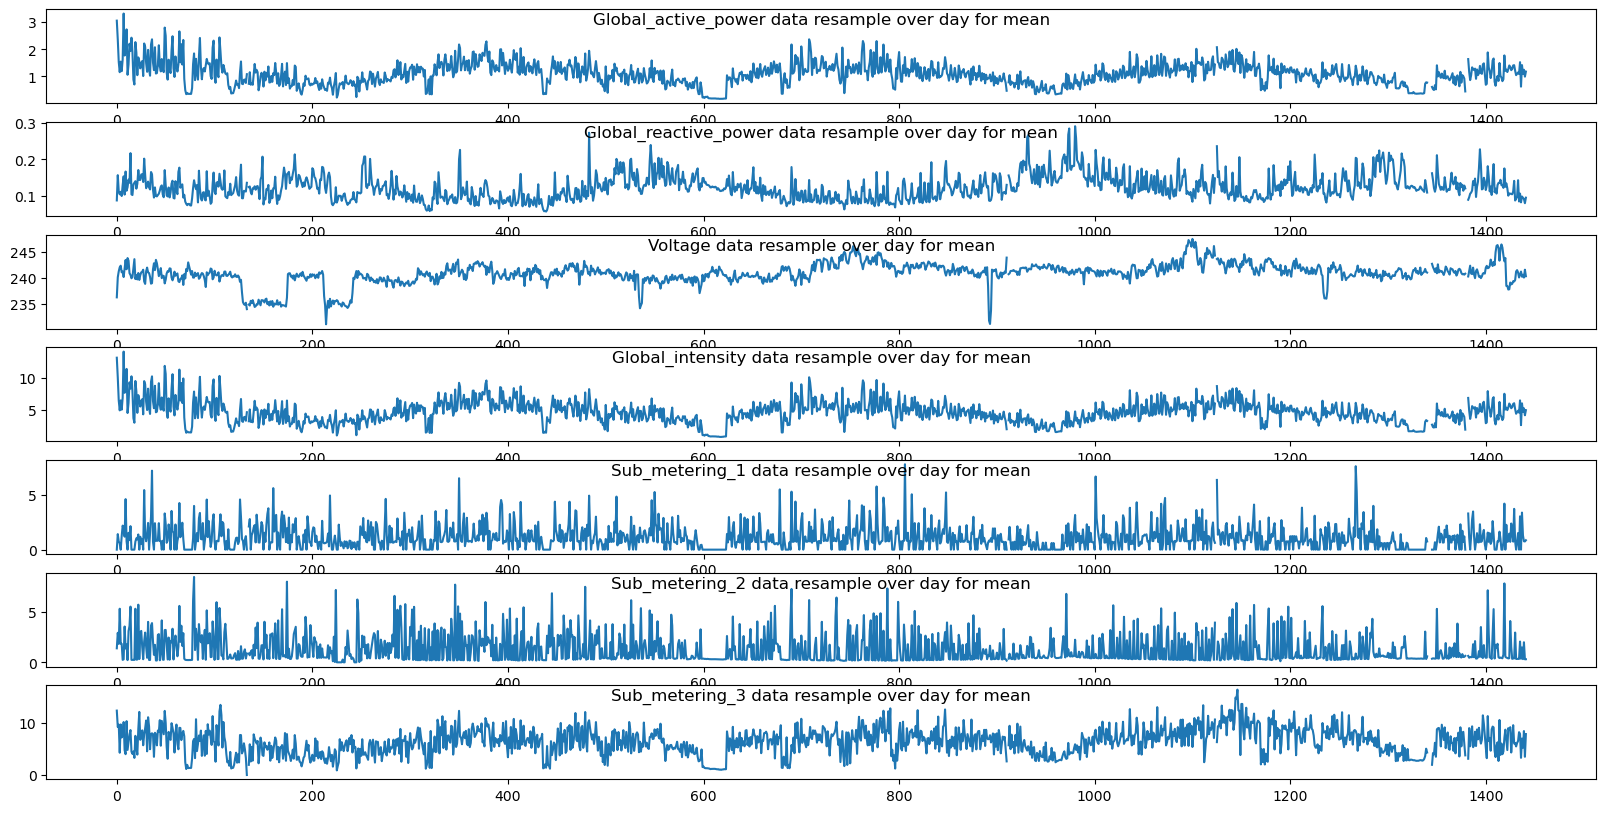

In [52]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] +'data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

In [56]:
df_resampled=df.resample('h').mean() 

In [61]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('Column%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('Column%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('Column%d(t+%d)' % (j+1)) for j in range(n_vars)]       
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [62]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_resampled)
df_scaled =pd.DataFrame(scaled)

In [63]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)

In [64]:
reframed=reframed.rename(columns = {'Column(t)': 'target'}, inplace = False)
reframed.head()

,Column1(t-1),Column2(t-1),Column3(t-1),Column4(t-1),Column5(t-1),Column6(t-1),Column7(t-1),Column1(t)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.455597


In [66]:
values = reframed.values
n_train_time = 365*24*3
train = values[:n_train_time, :]
test = values[n_train_time:, :]
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [68]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)     

(26280, 1, 7) (26280,) (7879, 1, 7) (7879,)


In [92]:
model = keras.Sequential()
model.add(layers.Bidirectional(layers.GRU(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Bidirectional(layers.GRU(64)))
#model.add(layers.Bidirectional(layers.GRU(32)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (None, 1, 256)           105216    
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              123648    
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [93]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=sgd, metrics=["mse"])     

In [94]:
hist=model.fit(X_train, y_train, epochs=100,batch_size=256,validation_data=(X_test, y_test),verbose=1,validation_steps=5,
                       steps_per_epoch=25)

Epoch 1/100
25/25 [==============================] - 4s 33ms/step - loss: 0.0277 - mse: 0.0554 - val_loss: 0.0179 - val_mse: 0.0359
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0123 - mse: 0.0246 - val_loss: 0.0155 - val_mse: 0.0310
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0107 - mse: 0.0214 - val_loss: 0.0127 - val_mse: 0.0254
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0105 - mse: 0.0211 - val_loss: 0.0128 - val_mse: 0.0256
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0203 - val_loss: 0.0125 - val_mse: 0.0250
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0105 - mse: 0.0210 - val_loss: 0.0121 - val_mse: 0.0242
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0207 - val_loss: 0.0118 - val_mse: 0.0236
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0102 - 

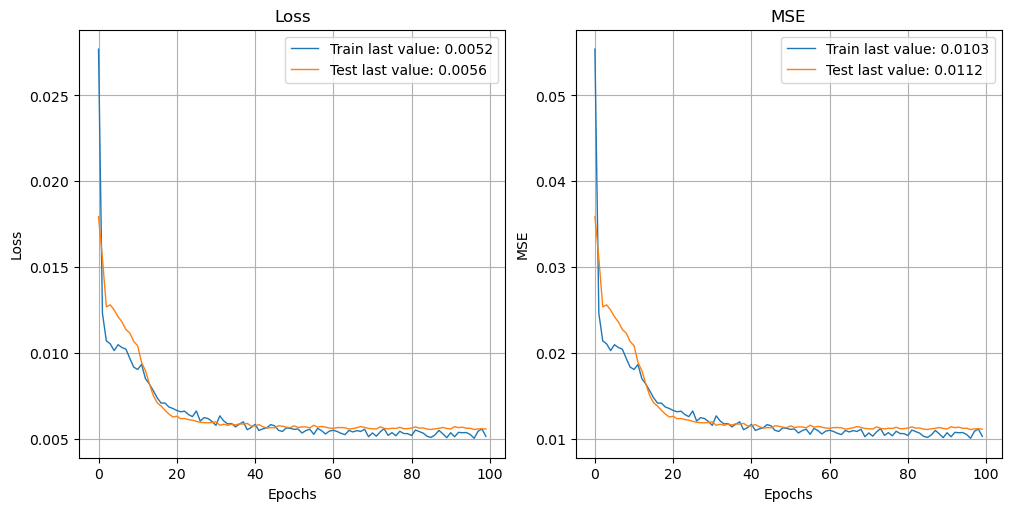

In [100]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
show_history(hist)
plot_history(hist,path="standard.png")
plt.close()

In [104]:
pred=model.predict(X_test)

247/247 [==============================] - 0s 1ms/step


In [105]:
pred

array([[0.15501076],
       [0.0667676 ],
       [0.06979414],
       ...,
       [0.24495442],
       [0.17689206],
       [0.12709445]], dtype=float32)